In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
#Loading training and test datasets.
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
print("Train data Shape: ", train_data.shape)
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
print("Test data Shape: ", test_data.shape)

#loading gender dataset to analyze how to output the result.
gendersub = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")
gendersub.head()

Train data Shape:  (891, 12)
Test data Shape:  (418, 11)


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [3]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
test_data.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Done Doing basic analysis of both datasets.
Now, we'll work on ***Exploratory Data Analysis*** of the Datasets

In [11]:
#removing null values from training dataset.
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data['Embarked'].fillna('S', inplace=True)
train_data.drop(['Cabin'],axis=1,inplace=True)
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [12]:
#removing null values from testing dataset.
test_data['Age'].fillna(train_data['Age'].median(), inplace=True)
test_data['Fare'].fillna(train_data['Fare'].median(), inplace=True)
test_data.drop(['Cabin'],axis=1,inplace=True)
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [13]:
#libraries for visualization.
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
train_data['Age'].corr(train_data['Survived'])

-0.06491041993052589

<AxesSubplot:>

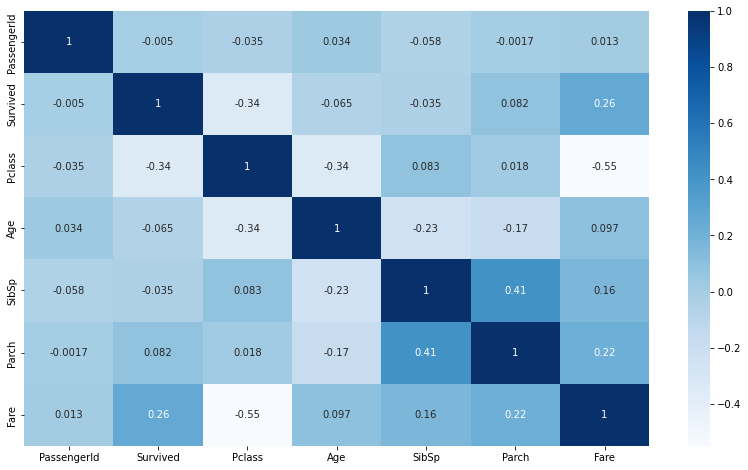

In [15]:
plt.figure(figsize=(14,8))
sns.heatmap(train_data.corr(), annot=True, cmap='Blues')

<AxesSubplot:xlabel='Parch', ylabel='SibSp'>

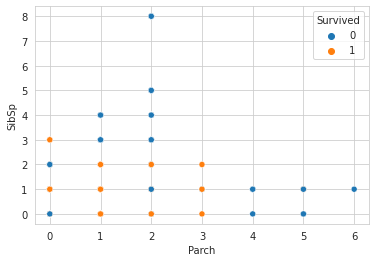

In [16]:
sns.set_style('whitegrid')
sns.scatterplot(x = 'Parch', y = 'SibSp',hue = 'Survived', data = train_data)

<AxesSubplot:xlabel='Sex', ylabel='Fare'>

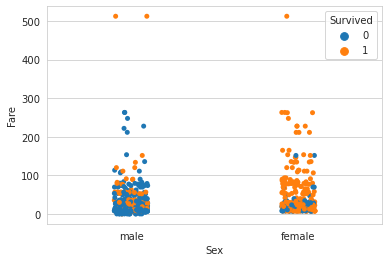

In [17]:
sns.set_style('whitegrid')
sns.stripplot(x = 'Sex',y = 'Fare', hue ='Survived', data = train_data)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

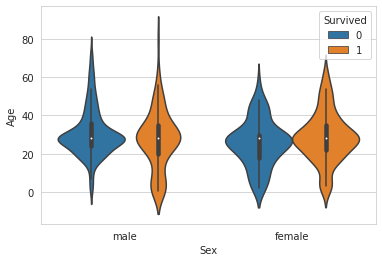

In [18]:
sns.set_style('whitegrid')
sns.violinplot(x = 'Sex', y ='Age',hue = 'Survived',data = train_data)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

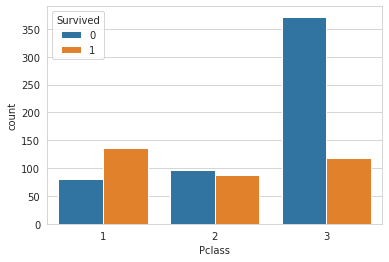

In [19]:
sns.set_style('whitegrid')
sns.countplot(x='Pclass',hue = 'Survived',data = train_data)

<AxesSubplot:xlabel='Sex', ylabel='count'>

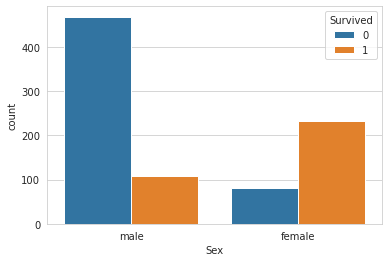

In [20]:
sns.set_style('whitegrid')
sns.countplot(x = 'Sex', hue = 'Survived', data = train_data)

# **Model Development for Predictive Analysis**

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [22]:
features = ["Pclass", "Sex", "SibSp", "Parch"]
for f in features:
    lbl = LabelEncoder() 
    lbl.fit(list(train_data[f].values)) 
    train_data[f] = lbl.transform(list(train_data[f].values))

In [23]:
y = train_data["Survived"]
x=train_data[features]

#split data
X_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3)
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [24]:
predictions = logreg.predict(x_test)
print(predictions)
accuracy = accuracy_score(y_test,predictions)
print('accuracy : {}'.format(accuracy))
print(classification_report(y_test,predictions))

[0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0
 1 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1 0
 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0
 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0
 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 1 1 0 0 1 0 1
 0 0 0 0 1 0 0 0 0]
accuracy : 0.7574626865671642
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       170
           1       0.69      0.61      0.65        98

    accuracy                           0.76       268
   macro avg       0.74      0.73      0.73       268
weighted avg       0.75      0.76      0.75       268



In [25]:
predictions = gendersub['Survived']
gendersub

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [26]:
gendersub.to_csv('Submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
